In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.list_logical_devices('GPU')

[]

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Label - Description </br>
0 -  T-shirt/top </br>
1 - Trouser </br>
2 - Pullover </br>
3 - Dress </br>
4 - Coat </br>
5 - Sandal </br>
6 - Shirt </br>
7 - Sneaker </br>
8 - Bag </br>
9 - Ankle boot

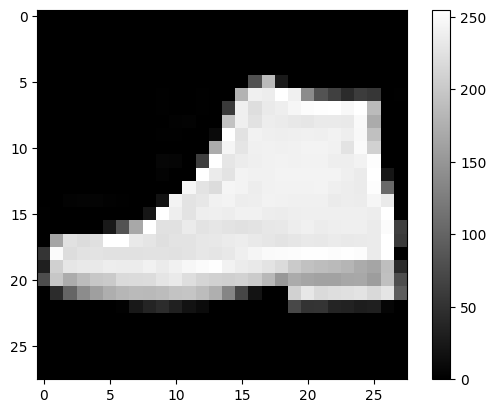

In [4]:
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_labels[data_idx]

np.uint8(9)

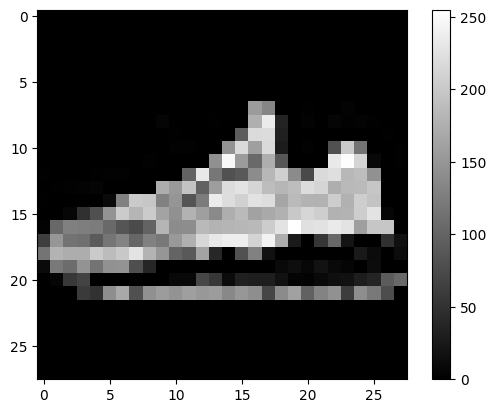

In [6]:
data_idx = 6174

plt.figure()
plt.imshow(test_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
test_labels[data_idx]

np.uint8(7)

In [8]:
test_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
number_of_classes = train_labels.max() + 1
number_of_classes

np.uint8(10)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

c:\Users\ricar\OneDrive\Desktop\codes\code 2\deep_learn_introduction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
image_height = 28
image_width = 28
number_of_classes = np.int32(10)

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

np.int32(7840)

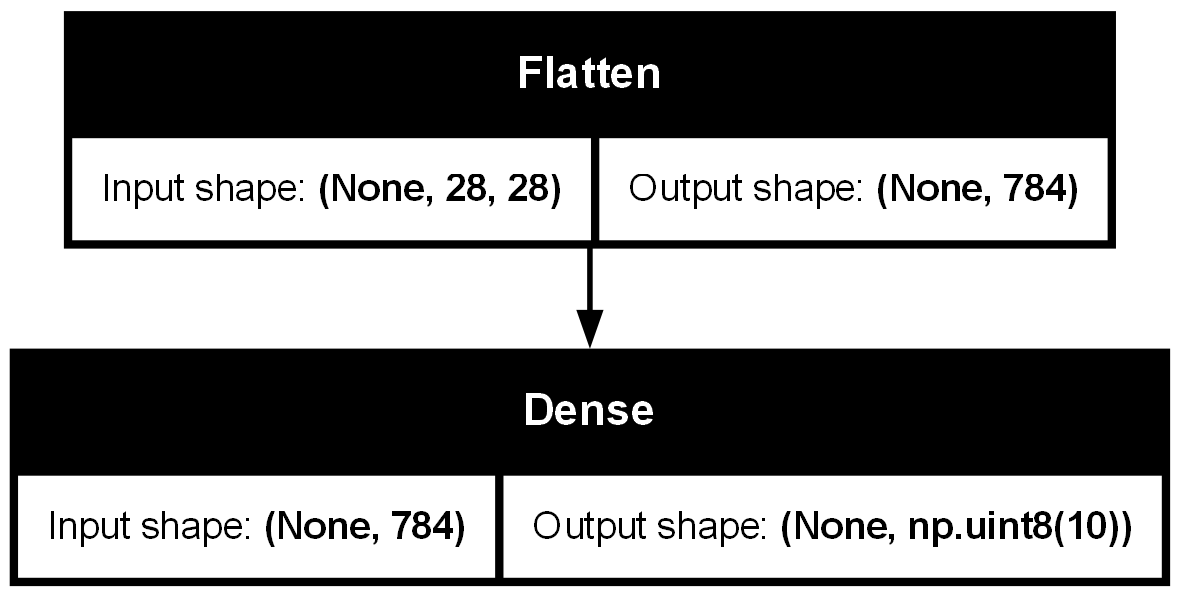

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6890 - loss: 23.8992 - val_accuracy: 0.7327 - val_loss: 16.5301
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7870 - loss: 11.8587 - val_accuracy: 0.7612 - val_loss: 17.3333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7940 - loss: 11.4422 - val_accuracy: 0.7651 - val_loss: 14.6060
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7984 - loss: 10.8408 - val_accuracy: 0.7824 - val_loss: 11.7536
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8097 - loss: 9.6581 - val_accuracy: 0.7403 - val_loss: 15.6904


In [16]:
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[ -291.92465  ,  -586.8261   ,  -131.16469  ,   -42.14893  ,
         -305.7914   ,   381.8228   ,   -57.475403 ,   269.7651   ,
           18.002235 ,   552.7298   ],
       [  380.265    ,  -290.71136  ,   284.60767  ,   264.85638  ,
           27.018295 , -1440.8679   ,   284.3087   , -2100.917    ,
         -196.38411  ,  -690.9117   ],
       [   99.32064  ,    17.196434 ,    98.577736 ,   139.00958  ,
           79.28924  ,  -410.45142  ,    98.89816  ,  -488.76096  ,
         -109.47819  ,  -312.38654  ],
       [  145.78922  ,   -35.57676  ,   132.32652  ,   194.57869  ,
           74.36875  ,  -732.64484  ,   147.35469  , -1207.0587   ,
         -184.94821  ,  -677.5724   ],
       [  161.24054  ,   115.542984 ,   136.8601   ,   279.84906  ,
          171.89693  ,  -886.2769   ,   157.006    ,  -858.09796  ,
         -140.58693  ,  -874.9933   ],
       [  208.09306  ,   -52.9732   ,   392.0952   ,   229.58127  ,
          252.04173  ,  -882.4192   ,   279.03452  , -182

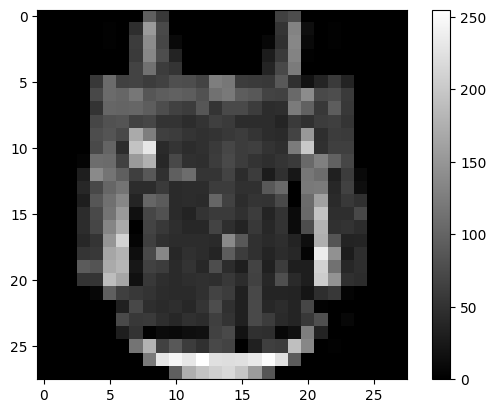

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


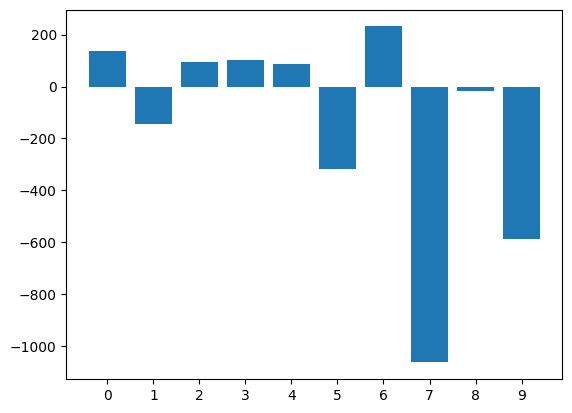

correct answer: 6


In [17]:
data_idx = 8675

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])